## 【前提条件】

* 特徴量は4つの中で2つだけを使う
    * 
* アヤメの種類を2つだけ使う
    * 2値分類 (分類対象が2種類)

## 【課題1】練習のために特徴量とカテゴリを選択

irisデータセットをWeek3同様に取得した後、データフレームからこれらを抜き出してください。

* virgicolorとvirginica
* sepal_lengthとpetal_length


In [2]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

iris = load_iris()

# 基データから特定の2種の特徴量を抽出。
iris_raw_data = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_data = iris_raw_data[['sepal length (cm)', 'petal length (cm)']]

# 基データから特定の2品種のみを抽出。
iris_raw_species = pd.DataFrame(iris.target, columns=["species"])
iris_species = iris_raw_species[iris_raw_species['species'].isin([1, 2])]

# 上記2つのデータを結合させる。
iris_df = pd.concat([iris_data, iris_species], join='inner', axis=1)

# iris_data
# iris_species
iris_df

,sepal length (cm),petal length (cm),species
50,7.0,4.7,1
51,6.4,4.5,1
52,6.9,4.9,1
53,5.5,4.0,1
54,6.5,4.6,1
...,...,...,...
145,6.7,5.2,2
146,6.3,5.0,2
147,6.5,5.2,2
148,6.2,5.4,2


## 【問題2】データの分析

抜き出したデータの散布図と箱ひげ図（boxplot）、バイオリン図（violinplot）を表示してください。

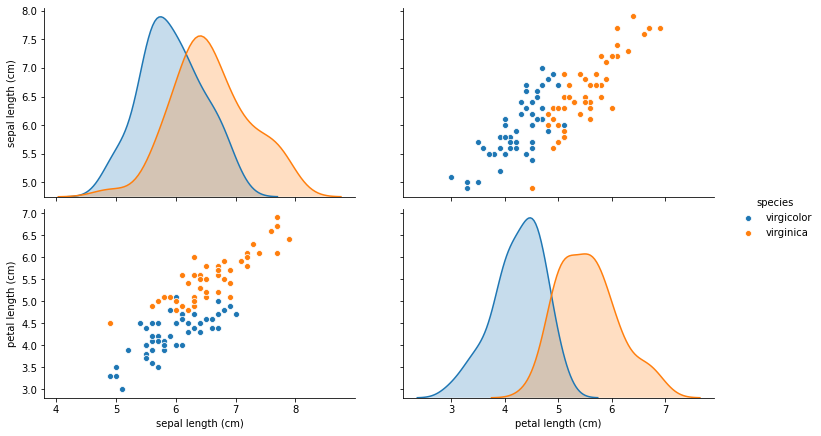

In [3]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

# iris_dfの散布図を描画する。

pg = sns.pairplot(iris_df, hue='species')

pg.fig.set_size_inches((12, 6))
lg = pg.fig.legends[0]
# lg.texts[0].set_text('setosa')
lg.texts[0].set_text('virgicolor')
lg.texts[1].set_text('virginica')

pg

# x = iris_df[['species']]
# y = iris_data[[]]
# fig, axes = plt.subplots(figsize = (12, 8))
# plt.scatter(x, y)
# axes.set_xticklabels(['setosa', 'virgiclor', 'virginica'])
# plt.title('sepal_length')
# plt.ylabel('length (cm)')
# plt.show()

In [102]:
import itertools

# 2品種のsepal_lengthのリスト化
# virgicolor
iris_species_virgicolor = iris_raw_species[iris_raw_species['species'].isin([1])]
iris_df_virgicolor = pd.concat([iris_data, iris_species_virgicolor], join='inner', axis=1)
# virginica
iris_species_virginica = iris_raw_species[iris_raw_species['species'].isin([2])]
iris_df_virginica = pd.concat([iris_data, iris_species_virginica], join='inner', axis=1)

sepal_length_virgicolor = iris_df_virgicolor[['sepal length (cm)']]
sepal_length_virginica = iris_df_virginica[['sepal length (cm)']]

petal_length_virgicolor = iris_df_virgicolor[['petal length (cm)']]
petal_length_virginica = iris_df_virginica[['petal length (cm)']]

sepal_length = [sepal_length_virgicolor, sepal_length_virginica]
petal_length = [petal_length_virgicolor, petal_length_virginica]

# sepal = list(itertools.chain.from_iterable(sepal_length))
# sepal = sepal_length.flatten()

# 上記方法だとグラフ化できなかったため、次のセルにてweek3の方法をcopy/pasteした。
# グラフ化できなかった原因として、エラーは"X must have 2 or fewer dimensions"のため、
# 平坦化を試みたが、うまくいかなかった。

In [4]:
# 2品種のsepal_lengthのリスト化

# virgicolor
virgiclor_sepal_length = iris_df.iloc[0:50, 0]
virgiclor_petal_length = iris_df.iloc[0:50, 1]

# virginica
virginica_sepal_length = iris_df.iloc[51:100, 0]
virginica_petal_length = iris_df.iloc[51:100, 1]

# 各ラベルごとの2要素を1Tupleに格納して、boxplot化する。
virgiclor_data = (virgiclor_sepal_length, virgiclor_petal_length)
virginica_data = (virginica_sepal_length, virginica_petal_length)

# 2要素ごとでリスト化
sepal_length = (virgiclor_data[0], virginica_data[0])
petal_length = (virgiclor_data[1], virginica_data[1])

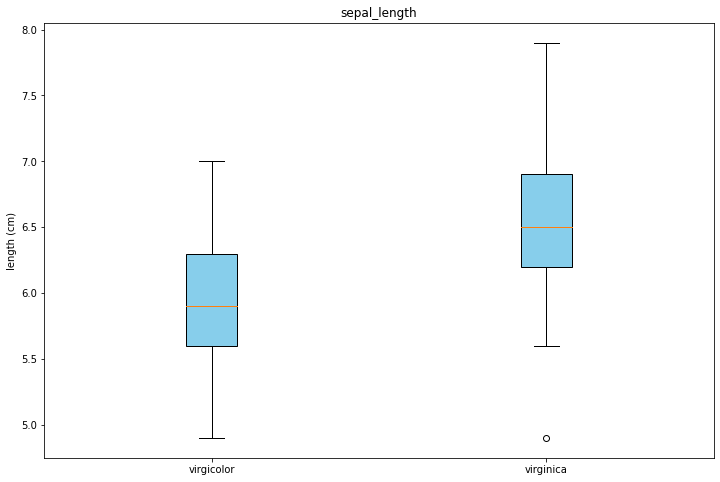

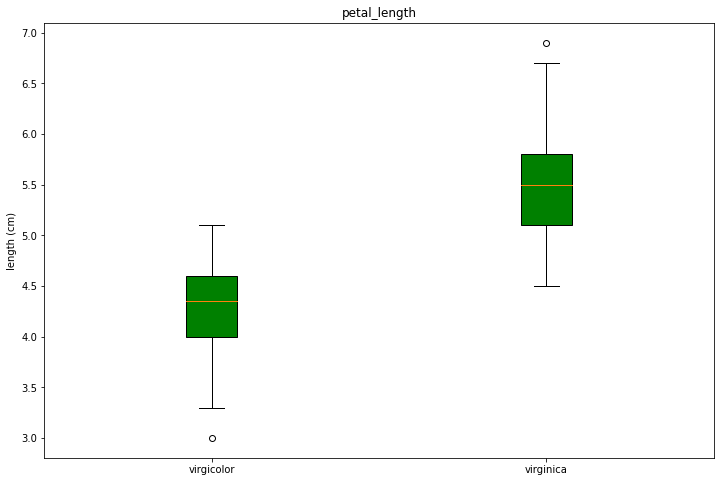

In [5]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

# iris_dfの箱ひげを描画する

# sepal_lengthの箱ひげ化
fig, axes = plt.subplots(figsize = (12, 8))
plt.boxplot(sepal_length, patch_artist=True, boxprops=dict(facecolor='skyblue', color='black', linewidth=1))
axes.set_xticklabels(['virgicolor', 'virginica'])

plt.title('sepal_length')
plt.ylabel('length (cm)')
plt.show()


# petal_lengthの箱ひげ化
fig, axes = plt.subplots(figsize = (12, 8))
plt.boxplot(petal_length, patch_artist=True, boxprops=dict(facecolor='green', color='black', linewidth=1))
axes.set_xticklabels(['virgicolor', 'virginica'])

plt.title('petal_length')
plt.ylabel('length (cm)')
plt.show()

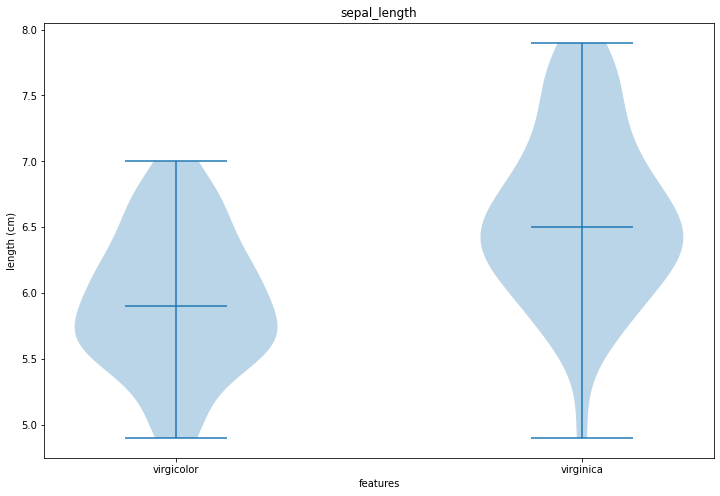

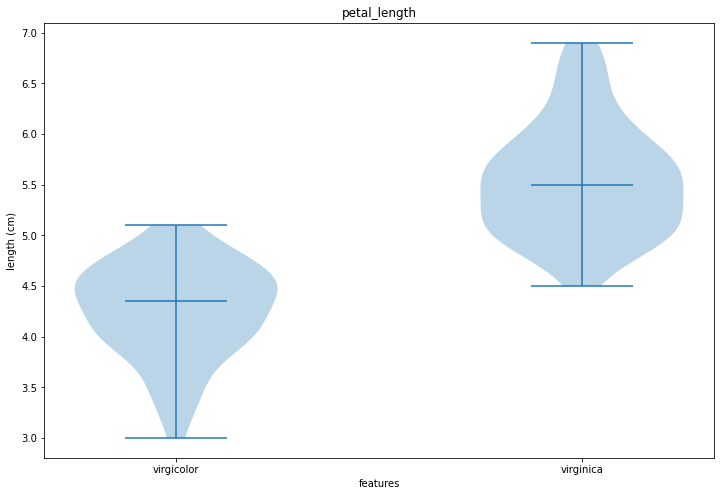

In [5]:
# バイオリン図（violinplot）

# Sepal_Length
fig, axes = plt.subplots(figsize = (12, 8))

axes.set_xticks([1, 2])
axes.set_xticklabels(['virgicolor', 'virginica'])
plt.title('sepal_length')
plt.xlabel('features')
plt.ylabel('length (cm)')

plt.violinplot(sepal_length, showmedians=True)
plt.show()

# Petal_Length
fig, axes = plt.subplots(figsize = (12, 8))

axes.set_xticks([1, 2])
axes.set_xticklabels(['virgicolor', 'virginica'])
plt.title('petal_length')
plt.xlabel('features')
plt.ylabel('length (cm)')

plt.violinplot(petal_length, showmedians=True)
plt.show()

## 【問題3】前処理・訓練データと検証データの分割

前処理の一貫として、訓練データと検証データの分割を行います。今回は訓練データ75%、検証データ25%として分割してください。


scikit-learnのtrain_test_splitが利用できます。公式ドキュメントのExamplesを参考に動かしてください。


[sklearn.model_selection.train_test_split — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [63]:
from sklearn.model_selection import train_test_split
import numpy as np

# ndarrayへの変換
# 特徴量（説明変数）をX、正解（目的変数）をyというndarrayに格納する。

# iris_dataから対象2品種のみに絞る。
iris_data_selected = iris_data.loc[50:, ]

X = np.array(iris_data_selected)
y = np.array(iris_species)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25, random_state=3)
# X_train.shape, y_train.shape

((75, 2), (75, 1))

## 【問題4】前処理・標準化

分類精度をあげるための加工（標準化）を行う。
* 標準化は訓練用のデータでfitを行い
* 訓練用、検証用双方のデータにtransformを行う。
* 検証データを標準化してはならない。

In [72]:
from sklearn.preprocessing import StandardScaler

#データを標準化
scl = StandardScaler()

#検証用データで標準化
scl.fit(X_train) 

# 訓練用、検証用双方のデータにtransformを行う
scl.transform(X_train)
scl.transform(X_test)


array([[ 0.82901982,  1.19327495],
       [ 2.15192378,  2.12917687],
       [ 0.09407317, -0.21057793],
       [-0.64087348,  0.25737303],
       [ 0.09407317,  0.14038529],
       [ 0.09407317,  0.25737303],
       [-0.05291616,  0.60833625],
       [-0.64087348, -1.02949211],
       [ 0.53504116, -0.56154115],
       [ 0.68203049, -0.56154115],
       [-0.19990549,  0.02339755],
       [-1.52280945, -1.14647986],
       [-0.93485214,  0.02339755],
       [ 0.38805183,  0.37436077],
       [-1.22883079, -0.44455341],
       [ 1.41697714,  1.31026269],
       [ 0.2410625 ,  0.84231173],
       [-0.19990549, -0.21057793],
       [ 1.41697714,  1.42725043],
       [-0.78786281, -0.79551663],
       [ 0.09407317,  0.02339755],
       [-0.34689482, -1.02949211],
       [ 0.53504116, -0.32756567],
       [ 0.38805183, -0.32756567],
       [ 1.41697714,  1.07628721]])

## 【問題5】学習と推定

最近傍法（k-nearest neighbors, k-nn）で学習（fit）を行います。scikit-learnの公式ドキュメントのExamplesを参考に、k-nnの学習を行ってください。ここで入力するのは訓練データです。

[sklearn.neighbors.KNeighborsClassifier — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier)

学習が終わった後、検証データをpredictメソッドに入力し、推定を行ってください。

## 最近傍法についての、自分なりの解釈

[参照元](https://qiita.com/renesisu727/items/e5191a97d3f16a14ebd0)

1. n次元数ベクトルの特殊空間があり、あるデータの特殊空間の位置はn個の説明変数で決定され、そのデータが属するクラスは目的変数により決定される。

2. 分類において、ある目的変数が未知のデータが与えられた時、そのデータの目的変数を特殊空間上に近い他のデータの目的変数の多数決で決定するのが、k-近傍法。

3. 多数決を行うとき、どれくらいの距離を近傍とするのかで分類が異なる。


In [73]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# 3種類のパラメータ設定を施した最近傍法をインスタンス化
iris_knn_5 = KNeighborsClassifier(n_neighbors=5)
iris_knn_1 = KNeighborsClassifier(n_neighbors=1)
iris_knn_3 = KNeighborsClassifier(n_neighbors=3)

# 訓練・検証用の両目的変数を1次元化
y_train = np.reshape(y_train,(-1))
y_test = np.reshape(y_test,(-1))

# ---------------------------------------------------- #
# 標準化された訓練データと訓練用の目的変数を用いてiris_knnを学習させる。

# n_neighbors = default (5)の場合
iris_knn_5.fit(X_train, y_train)

# n_neighbors = 1-nn
iris_knn_1.fit(X_train, y_train)

# n_neighbors = 3-nn
iris_knn_3.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [69]:
# 説明変数の検証データ(X_test)をpredictメソッドに入力し、目的変数を予測し、一致率を算出する。

# n_neighbors = default (5)の場合
print("n_neighbors = default (5)の場合の推定値は\n{}".format(iris_knn_5.predict(X_test)))
y_pred_5 = iris_knn_5.predict(X_test)
print("予測精度計測結果は{}".format(metrics.accuracy_score(y_test, y_pred_5)))

# n_neighbors = 1-nn
print("n_neighbors = 1-nnの場合の場合の推定値は\n{}".format(iris_knn_1.predict(X_test)))
y_pred_1 = iris_knn_1.predict(X_test)
print("予測精度計測結果は{}".format(metrics.accuracy_score(y_test, y_pred_1)))

# n_neighbors = 3-nn
print("n_neighbors = 3-nnの場合の場合の推定値は\n{}".format(iris_knn_3.predict(X_test)))
y_pred_3 = iris_knn_3.predict(X_test)
print("予測精度計測結果は{}".format(metrics.accuracy_score(y_test, y_pred_3)))

n_neighbors = default (5)の場合の推定値は
[2 2 1 2 2 2 2 1 1 1 2 1 2 2 1 2 2 1 2 1 2 1 1 1 2]
予測精度計測結果は1.0
n_neighbors = 1-nnの場合の場合の推定値は
[2 2 2 2 1 1 2 1 1 1 2 1 2 2 1 2 2 1 2 1 1 1 1 1 2]
予測精度計測結果は0.84
n_neighbors = 3-nnの場合の場合の推定値は
[2 2 1 2 2 2 2 1 1 1 2 1 2 2 1 2 2 1 2 1 2 1 1 1 2]
予測精度計測結果は1.0


## 【問題6】評価

検証データの特徴量を入力して得られた推定値と、検証データの正解値の近さを計算し、学習したモデルを評価します。

2値分類を評価するための指標値には Accuracy（正解率）、Precision（適合率）、Recall（再現率）、F値 があります。それぞれの意味を理解するには、 混同行列（confusion matrix） を見ることになります。

* scikit-learnを使い4種類の指標を計算する
* 混同行列をscikit-learnを使い表示する
* 4種類の指標値の意味について簡単に調査して文章でまとめる

In [71]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


# n_neighbors = default (5)の場合
y_pred_5 = iris_knn_5.predict(X_test)
knn_5_accuracy = accuracy_score(y_test, y_pred_5) * 100
print("5-nnの正解率は{:.2f}%".format(knn_5_accuracy))

knn_5_precision = precision_score(y_test, y_pred_5) * 100
print("5-nnの適合率は{:.2f}%".format(knn_5_precision))

knn_5_recall = recall_score(y_test, y_pred_5) * 100
print("5-nnの再現率は{:.2f}%".format(knn_5_recall))

knn_5_f1 = f1_score(y_test, y_pred_5) * 100
print("5-nnのF1値は{:.2f}%".format(knn_5_f1))

knn_5_confusion = confusion_matrix(y_test, y_pred)
print("5-nnの混同行列は\n{}".format(knn_5_confusion))

# n_neighbors = 1-nn
y_pred_1 = iris_knn_1.predict(X_test)
knn_1_accuracy = accuracy_score(y_test, y_pred) * 100
print("\n1-nnの正解率は{:.2f}".format(knn_1_accuracy))

knn_1_precision = precision_score(y_test, y_pred) * 100
print("1-nnの適合率は{:.2f}".format(knn_1_precision))

knn_1_recall = recall_score(y_test, y_pred) * 100
print("1-nnの再現率は{:.2f}".format(knn_1_recall))

knn_1_f1 = f1_score(y_test, y_pred) * 100
print("1-nnのF1値は{:.2f}".format(knn_1_f1))

knn_1_confusion = confusion_matrix(y_test, y_pred)
print("1-nnの混同行列は\n{}".format(knn_1_confusion))


# n_neighbors = 3-nn
y_pred = iris_knn_3.predict(X_test)
knn_3_accuracy = accuracy_score(y_test, y_pred) * 100
print("\n3-nnの正解率は{:.2f}".format(knn_3_accuracy))

knn_3_precision = precision_score(y_test, y_pred) * 100
print("3-nnの適合率は{:.2f}".format(knn_3_precision))

knn_3_recall = recall_score(y_test, y_pred) * 100
print("3-nnの再現率は{:.2f}".format(knn_3_recall))

knn_3_f1 = f1_score(y_test, y_pred) * 100
print("3-nnのF1値は{:.2f}".format(knn_3_f1))

knn_3_confusion = confusion_matrix(y_test, y_pred)
print("3-nnの混同行列は\n{}".format(knn_3_confusion))


5-nnの正解率は100.00%
5-nnの適合率は100.00%
5-nnの再現率は100.00%
5-nnのF1値は100.00%
5-nnの混同行列は
[[11  0]
 [ 0 14]]

1-nnの正解率は100.00
1-nnの適合率は100.00
1-nnの再現率は100.00
1-nnのF1値は100.00
1-nnの混同行列は
[[11  0]
 [ 0 14]]

3-nnの正解率は100.00
3-nnの適合率は100.00
3-nnの再現率は100.00
3-nnのF1値は100.00
3-nnの混同行列は
[[11  0]
 [ 0 14]]


## 4種類の指標値の意味について

まずは混同行列の各予測結果は以下の通り。
1. 真陽性（True-Positive）：予測が陽性、結果も陽性
2. 真陰性（True-Negative）：予測が陽性、結果が陰性
3. 偽陽性（False-Positive）：予測が陰性、結果が陽性
4. 偽陰性（False-Negative）：予測が陰性、結果も陰性


* 正解率（accuracy）
    * 全ての予測結果のうち真の値と一致した割合。
    * つまり、正解した予測の数値と全体との割合。
    * 正事例（陽性）と負事例（陰性）が不均衡な場合には正解率単独での指標は不適正。

$\begin{align}
Accuracy = \frac{TP + TN}{TP + TN + FP + FN}
\end{align}$

* 適合率または精度（precision, PPV）
    * 正事例（陽性）と予測された結果のうち、予測が正解した割合。
    
$\begin{align}
Precision = \frac{TP}{TP + FP}
\end{align}$
    
* 再現率（recall, sensitivity, hit rate, TPR）
    * 正事例（陽性）に分類すべき実際の結果から、予測が正解した割合。
    
$\begin{align}
Recall = \frac{TP}{TP + FN}
\end{align}$
    
* F値（F-measure, F-score, F1-score ）
    * 適合率と再現率の調和平均。
    * 以下をaとbの調和平均と呼ぶ。

$\begin{align}
\frac{2}{\frac{1}{a}+\frac{1}{b}}
\end{align}$

    * そのため、F1の式は以下の通り。
    
$\begin{align}
F1 = \frac{2 * (precision * recall)}{precision + recall}
\end{align}$


## 【問題7】可視化


In [74]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['virgicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。

    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

### 訓練データをプロット（3-nn）

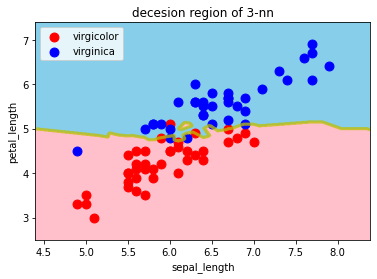

In [76]:
decision_region(X_train, y_train, iris_knn_3, title='decesion region of 3-nn',  xlabel='sepal_length', ylabel='petal_length')

### 検証データをプロット（3-nn）

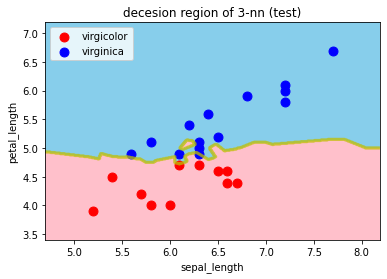

In [77]:
decision_region(X_test, y_test, iris_knn_3, title='decesion region of 3-nn (test)', xlabel='sepal_length', ylabel='petal_length')

## 【問題8】他の手法の学習

1. 以下の全ての手法について学習・推定・評価・可視化を行ってください。
  
    * 最近傍法
    * ロジスティック回帰
    * SVM
    * 決定木
    * ランダムフォレスト
    
2. <u>指標値</u>を１つの表にまとめてください。
3. その表と決定領域を利用して結果を簡単に考察してください。どの手法がどの指標値で良かったかや、どういった決定領域になっていたかを述べてください。

### 【指標値】

* 連続する数値の相対的な変化量を把握するために、ある時点の基準を100としたときの現在の値。
* 単に指標ともいう。

## 最近傍法

### 1. 学習 - 最近傍法で学習を行う。

In [232]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import numpy as np

X = np.array(iris_data_selected)
y = np.array(iris_species)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25, random_state=0)

iris_knn_5 = KNeighborsClassifier(n_neighbors=5)
iris_knn_1 = KNeighborsClassifier(n_neighbors=1)
iris_knn_3 = KNeighborsClassifier(n_neighbors=3)
y_train = np.reshape(y_train,(-1))
y_test = np.reshape(y_test,(-1))

# データを標準化
scl = StandardScaler()
scl.fit(X_train)
x_train = scl.transform(X_train)
x_test = scl.transform(X_test)

# n_neighbors = default (5)の場合
iris_knn_5.fit(X_train, y_train)

# n_neighbors = 1-nn
iris_knn_1.fit(X_train, y_train)

# n_neighbors = 3-nn
iris_knn_3.fit(X_train, y_train)

%precision 3

'%.3f'

### 2. 推定 - 検証データをpredictメソッドに入力し、推定を行う。

In [233]:
# 検証データ（X_test）をpredictメソッドに入力し、目的変数（y_pred）を予測し、一致率を算出する。
# n_neighbors = default (5)の場合
print("n_neighbors = default (5)の場合、\n{}".format(iris_knn_5.predict(X_test)))

# n_neighbors = 1-nn
print("n_neighbors = 1-nnの場合、\n{}".format(iris_knn_1.predict(X_test)))

# n_neighbors = 3-nn
print("n_neighbors = 3-nnの場合、\n{}".format(iris_knn_3.predict(X_test)))


n_neighbors = default (5)の場合、
[1 2 1 2 2 2 1 2 2 2 2 2 2 1 1 1 2 1 2 1 1 2 1 2 1]
n_neighbors = 1-nnの場合、
[1 2 2 2 2 2 1 2 2 1 2 2 2 1 1 1 2 1 2 1 1 2 1 2 1]
n_neighbors = 3-nnの場合、
[1 2 1 2 2 2 1 2 2 2 2 2 2 1 1 1 2 1 2 1 1 2 1 2 1]


### 3. 評価 - 推定値と検証データの正解値の近さを算出。

In [234]:
# 5-nn
y_pred = iris_knn_5.predict(X_test)
knn_5_accuracy = accuracy_score(y_test, y_pred) * 100
print("Accuracy（正解率）: {:.1f}%".format(knn_5_accuracy))

knn_5_precision = precision_score(y_test, y_pred) * 100
print("Precision（適合率）: {:.1f}%".format(knn_5_precision))

knn_5_recall = recall_score(y_test, y_pred) * 100
print("Recall（再現率）: {:.1f}%".format(knn_5_recall))

knn_5_f1 = f1_score(y_test, y_pred) * 100
print("F1値 : {:.1f}%".format(knn_5_f1))

knn_5_confusion = confusion_matrix(y_test, y_pred)
print("5-nnの混同行列は\n{}".format(knn_5_confusion))

Accuracy（正解率）: 92.0%
Precision（適合率）: 100.0%
Recall（再現率）: 84.6%
F1値 : 91.7%
5-nnの混同行列は
[[11  2]
 [ 0 12]]


### 4. 可視化 - 決定領域を描く関数を流用。

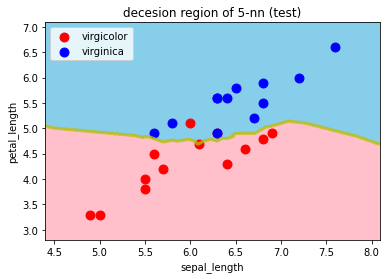

In [235]:
decision_region(X_test, y_test, iris_knn_5, title='decesion region of 5-nn (test)', xlabel='sepal_length', ylabel='petal_length')

## ロジスティック回帰

### ロジスティック回帰とは、
   * 教師あり学習に属するモデル。
   * クラス分類や確率の予測などに使われる分析手法。
   * 目的変数が2値の時に利用。
   * ロジスティック関数（シグモイド関数）を使って作成。
   * 前処理（カテゴリー変数のダミー化、多重共線性の削除）を行う。
   * 目的変数の１次元配列化も必要

### 1. 前処理 - データセットを検証用と訓練用に分ける、標準化処理

In [236]:
# ライブラリーのインポート。
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = np.array(iris_data_selected)
y = np.array(iris_species)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25, random_state=0)

# yの一次元化
y_train = np.reshape(y_train,(-1))
y_test = np.reshape(y_test,(-1))

# データを標準化
scl = StandardScaler()
scl.fit(X_train)
x_train = scl.transform(X_train)
x_test = scl.transform(X_test)


### 2. 学習 - LogisticRegressionを行う。

In [237]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(C=1e5) #インスタンス化
clf.fit(x_train, y_train) # clfを学習

LogisticRegression(C=100000.0)

### 3. 推定 - predictを行う

In [238]:
lr_pred = clf.predict(x_test)

### 4. 評価 - Accuracy, Precision, Recall, F値, 混同行列を行う。

In [239]:
lr_accuracy = accuracy_score(y_test, lr_pred) * 100
print("Accuracy（正解率）: {:.1f}%".format(lr_accuracy))

lr_precision = precision_score(y_test, lr_pred) * 100
print("Precision（適合率）: {:.1f}%".format(lr_precision))

lr_recall = recall_score(y_test, lr_pred) * 100
print("Recall（再現率）: {:.1f}%".format(lr_recall))

lr_f1 = f1_score(y_test, lr_pred) * 100
print("F1値 : {:.1f}%".format(lr_f1))

lr_confusion = confusion_matrix(y_test, lr_pred)
print("Confusion Matrix（混同行列） : \n{}".format(lr_confusion))

# print(lr_pred)
# print(y_test)

Accuracy（正解率）: 92.0%
Precision（適合率）: 100.0%
Recall（再現率）: 84.6%
F1値 : 91.7%
Confusion Matrix（混同行列） : 
[[11  2]
 [ 0 12]]


### 5. 可視化 - 決定領域を描く関数を流用。

C:\Users\Nacho\Anaconda3\envs\jupyter_DIC\lib\site-packages\ipykernel_launcher.py:40: UserWarning: No contour levels were found within the data range.


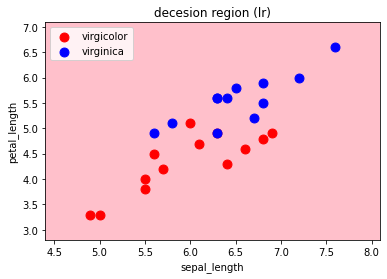

In [240]:
decision_region(X_test, y_test, clf, title='decesion region (lr)', xlabel='sepal_length', ylabel='petal_length')

## SVM（サポートベクターマシン）

### SVMとは
* 分類または回帰分析を行うことができる。
* 境界線から最も近いデータまでの距離を最大にするよう、パターン識別を行うモデル。


### 1. 前処理 - データセットを検証用と訓練用に分ける、標準化処理

In [241]:
# ライブラリーのインポート。
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = np.array(iris_data_selected)
y = np.array(iris_species)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25, random_state=0)

# yの一次元化
y_train = np.reshape(y_train,(-1))
y_test = np.reshape(y_test,(-1))

# データを標準化
scl = StandardScaler()
scl.fit(X_train)
x_train = scl.transform(X_train)
x_test = scl.transform(X_test)

### 2. 学習 - インポートしたSVCをインスタンス化し、fit()関数で学習させる。

In [242]:
from sklearn.svm import SVC
svc_model = SVC(gamma='scale')
svc_model.fit(X_train, y_train)

SVC()

### 3. 推定 - 学習済のモデルとpredict()関数を用い、予測を行う。

In [243]:
y_pred = svc_model.predict(X_test)

print(y_test[:10])
print(y_pred[:10])

[1 2 1 2 2 2 1 2 2 2]
[1 2 1 2 2 2 1 2 2 2]


### 4. 評価 - Accuracy, Precision, Recall, F値, 混同行列を行う。

In [244]:
svc_accuracy = accuracy_score(y_test, y_pred) * 100
print("Accuracy（正解率）: {:.1f}%".format(svc_accuracy))

svc_precision = precision_score(y_test, y_pred) * 100
print("Precision（適合率）: {:.1f}%".format(svc_precision))

svc_recall = recall_score(y_test, y_pred) * 100
print("Recall（再現率）: {:.1f}%".format(svc_recall))

svc_f1 = f1_score(y_test, y_pred) * 100
print("F1値 : {:.1f}%".format(svc_f1))

svc_confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix（混同行列） : \n{}".format(svc_confusion))

# print(y_test)
# print(y_pred)

Accuracy（正解率）: 92.0%
Precision（適合率）: 100.0%
Recall（再現率）: 84.6%
F1値 : 91.7%
Confusion Matrix（混同行列） : 
[[11  2]
 [ 0 12]]


### 5. 可視化 - 決定領域を描く関数を流用。

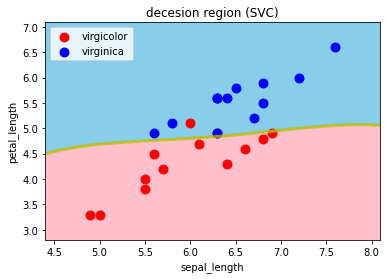

In [245]:
decision_region(X_test, y_test, svc_model, title='decesion region (SVC)', xlabel='sepal_length', ylabel='petal_length')

## 決定木

### 決定木とは
* 分類または回帰分析を行うことができる。
* 木構造を用いて分類や回帰を行う機械学習の手法の一つ。
* 名前の通り分類木は対象を分類する問題を解き，回帰木は対象の数値を推定する問題を解く。
* 分類性能ではSVMがより有効
* 過学習を起こしやすいため、パラメータの調整や枝の刈込が必要

### 1. 前処理 - データセットを検証用と訓練用に分ける、標準化処理

In [246]:
# ライブラリーのインポート。
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = np.array(iris_data_selected)
y = np.array(iris_species)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25, random_state=0)

# yの一次元化
y_train = np.reshape(y_train,(-1))
y_test = np.reshape(y_test,(-1))

# データを標準化
scl = StandardScaler()
scl.fit(X_train)
x_train = scl.transform(X_train)
x_test = scl.transform(X_test)

### 2. 学習 - インポートしたtreeをインスタンス化し、fit()関数で学習させる。

In [247]:
from sklearn import tree

iris = load_iris()
 
clf = tree.DecisionTreeClassifier(max_depth = 3)
clf = clf.fit(X_train, y_train)

### 3. 推定 - 学習済のモデルとpredict()関数を用い、予測を行う。

In [248]:
y_pred = clf.predict(X_test)

### 4. 評価 - Accuracy, Precision, Recall, F値, 混同行列を行う。

In [249]:
tree_accuracy = accuracy_score(y_test, y_pred) * 100
print("Accuracy（正解率）: {:.1f}%".format(tree_accuracy))

tree_precision = precision_score(y_test, y_pred) * 100
print("Precision（適合率）: {:.1f}%".format(tree_precision))

tree_recall = recall_score(y_test, y_pred) * 100
print("Recall（再現率）: {:.1f}%".format(tree_recall))

tree_f1 = f1_score(y_test, y_pred) * 100
print("F1値 : {:.1f}%".format(tree_f1))

tree_confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix（混同行列） : \n{}".format(tree_confusion))

Accuracy（正解率）: 88.0%
Precision（適合率）: 100.0%
Recall（再現率）: 76.9%
F1値 : 87.0%
Confusion Matrix（混同行列） : 
[[10  3]
 [ 0 12]]


### 5. 可視化 - 決定領域を描く関数を流用。

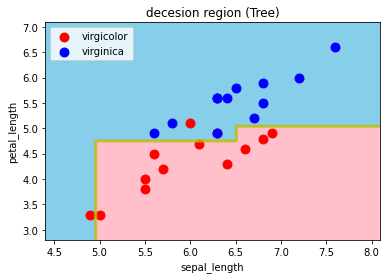

In [250]:
decision_region(X_test, y_test, clf, title='decesion region (Tree)', xlabel='sepal_length', ylabel='petal_length')

## ランダムフォレスト

### ランダムフォレストとは
* 決定木を沢山組み合わせたもの。
* アンサンブル学習のひとつ。
    * アンサンブル学習とは、複数の学習機を組み合わせてより良い予測を得ようとするテクニック。
    * 単一のモデルを用いるよりも良い結果が得られる。
    * アンサンブル学習においてよく用いられるテクニックとして、バギングやブースティング、スタッキングやバンピングなどがある。

### 1. 前処理 - データセットを検証用と訓練用に分ける、標準化処理

In [251]:
# ライブラリーのインポート。
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = np.array(iris_data_selected)
y = np.array(iris_species)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25, random_state=0)

# yの一次元化
y_train = np.reshape(y_train,(-1))
y_test = np.reshape(y_test,(-1))

# データを標準化
scl = StandardScaler()
scl.fit(X_train)
x_train = scl.transform(X_train)
x_test = scl.transform(X_test)

### 2. 学習 - インポートしたRandomForestClassifierをインスタンス化し、fit()関数で学習させる。

In [252]:
from sklearn.ensemble import RandomForestClassifier

random_clf = RandomForestClassifier()
random_clf.fit(X_train, y_train)

RandomForestClassifier()

### 3. 推定 - 学習済のモデルとpredict()関数を用い、予測を行う。

In [253]:
y_pred = random_clf.predict(X_test)

### 4. 評価 - Accuracy, Precision, Recall, F値, 混同行列を行う。

In [254]:
random_accuracy = accuracy_score(y_test, y_pred) * 100
print("Accuracy（正解率）: {:.1f}%".format(random_accuracy))

random_precision = precision_score(y_test, y_pred) * 100
print("Precision（適合率）: {:.1f}%".format(random_precision))

random_recall = recall_score(y_test, y_pred) * 100
print("Recall（再現率）: {:.1f}%".format(random_recall))

random_f1 = f1_score(y_test, y_pred) * 100
print("F1値 : {:.1f}%".format(random_f1))

random_confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix（混同行列） : \n{}".format(random_confusion))

Accuracy（正解率）: 84.0%
Precision（適合率）: 100.0%
Recall（再現率）: 69.2%
F1値 : 81.8%
Confusion Matrix（混同行列） : 
[[ 9  4]
 [ 0 12]]


### 5. 可視化 - 決定領域を描く関数を流用。

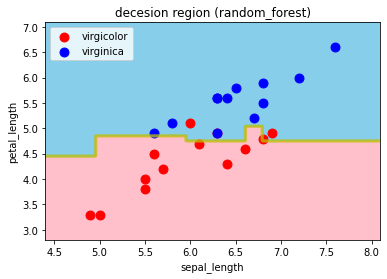

In [255]:
decision_region(X_test, y_test, random_clf, title='decesion region (random_forest)', xlabel='sepal_length', ylabel='petal_length')

## 全ての学習法からの指標値の評価

In [256]:
final_list = [knn_5_accuracy, knn_5_precision, knn_5_recall, knn_5_f1,
             lr_accuracy, lr_precision, lr_recall, lr_f1,
             svc_accuracy, svc_precision, svc_recall, svc_f1,
             tree_accuracy, tree_precision, tree_recall, tree_f1,
             random_accuracy, random_precision, random_recall, random_f1]

df = pd.DataFrame(np.array(final_list).reshape(5, 4),
                 columns=['Accuracy', 'Precision', 'Recall', 'F1'],
                 index=['KNeighbors', 'Logistic_reg', 'SVM', 'Tree', 'Random_Forest'])

df

,Accuracy,Precision,Recall,F1
KNeighbors,92.0,100.0,84.615385,91.666667
Logistic_reg,92.0,100.0,84.615385,91.666667
SVM,92.0,100.0,84.615385,91.666667
Tree,88.0,100.0,76.923077,86.956522
Random_Forest,84.0,100.0,69.230769,81.818182


## 結果考察
    
    * 全ての学習ではrandom_seed=0で設定した。
    * ロジスティック回帰の際、contour levels（輪郭）がデータ上見つからなかった。
    * 全体的に最良な指標値を返したのは、最近傍法、ロジスティック回帰、SVMであった。
    * データの数が少なかったせいか、適合率はどの学習法も100%であった。
    * 意外にも、ランダムフォレストが決定木より、全ての評価で低かった。